In [7]:
import gym
import minihack
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display

In [8]:
from utils import *
from algorithms import bfs, a_star

In [21]:
env = gym.make("MiniHack-ExploreMaze-Hard-Mapped-v0", observation_keys=("chars", "pixel"))
state = env.reset()
env.render()

/opt/anaconda3/envs/miniprova/lib/python3.8/site-packages/minihack/scripts/mh_patch_nhdat.sh: line 25: cd: /Users/valeriorusso/proveaif/[AIF]: No such file or directory



Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
---         ----          ---                                                   
|.           .>            .|                                                   
|.... ... ..... . ... ......|                                                   
|.. . . . . ... . . . .   ..|                                                   
|.... . ... ... ... ..... ..|                                                   
|..   .     ... .         ..|                                                   
|.. ... ... ... ... ........|                                                   
|.. . . . . ... .   . .    .|                                                   
|.. . . . . ... . ... . ...

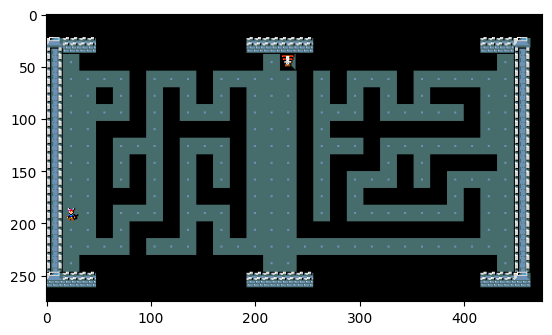

In [22]:
plt.imshow(state['pixel'][25:300, :475])

In [23]:
game_map = state['chars']
game = state['pixel']

In [24]:
start = get_player_location(game_map)
target = get_target_location(game_map)
print("Agent position:", start)
print("Target position:", target)

Agent position: (13, 1)
Target position: (4, 14)


In [25]:
%%time
path = bfs(game_map, start, target)

Target found!
CPU times: user 403 µs, sys: 27 µs, total: 430 µs
Wall time: 432 µs


In [26]:
path

[(13, 1),
 (14, 1),
 (15, 1),
 (15, 2),
 (15, 3),
 (15, 4),
 (14, 4),
 (13, 4),
 (13, 5),
 (13, 6),
 (12, 6),
 (11, 6),
 (10, 6),
 (9, 6),
 (8, 6),
 (7, 6),
 (6, 6),
 (5, 6),
 (5, 7),
 (5, 8),
 (6, 8),
 (7, 8),
 (7, 9),
 (7, 10),
 (6, 10),
 (5, 10),
 (5, 11),
 (5, 12),
 (5, 13),
 (5, 14),
 (4, 14)]

In [27]:
actions = actions_from_path(start, path[1:])

In [28]:
actions

[2,
 2,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 2,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0]

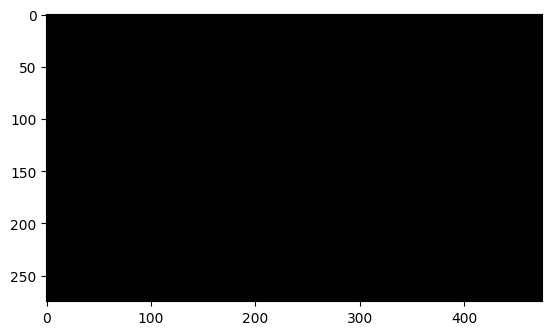

In [29]:
image = plt.imshow(game[25:300, :475])
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][25:300, :475])

# OFFICIAL TRIES

------------------------
-----------------
------------------

/opt/anaconda3/envs/miniprova/lib/python3.8/site-packages/minihack/scripts/mh_patch_nhdat.sh: line 25: cd: /Users/valeriorusso/proveaif/[AIF]: No such file or directory


Agent position: (12, 32)
Target position: (9, 41)


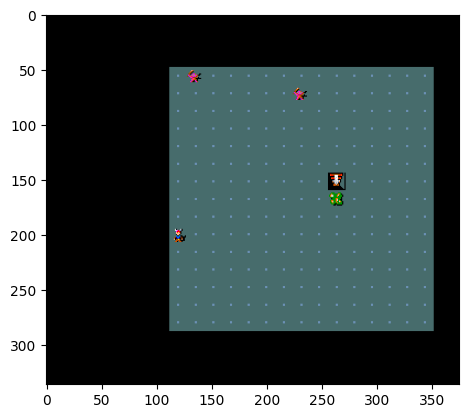

In [111]:
env = gym.make("MiniHack-Room-Monster-15x15-v0", observation_keys=("chars", "pixel", "blstats"))
state = env.reset()

plt.imshow(state['pixel'][0:500, 400:775])

game_map = state['chars']
game = state['pixel']
game_stats = state['blstats']

start = get_player_location(game_map)
target = get_target_location(game_map)
hp = game_stats[6]
print("Agent position:", start)
print("Target position:", target)

/opt/anaconda3/envs/miniprova/lib/python3.8/site-packages/minihack/scripts/mh_patch_nhdat.sh: line 25: cd: /Users/valeriorusso/proveaif/[AIF]: No such file or directory


Agent position: (7, 1)
Target position: (8, 14)


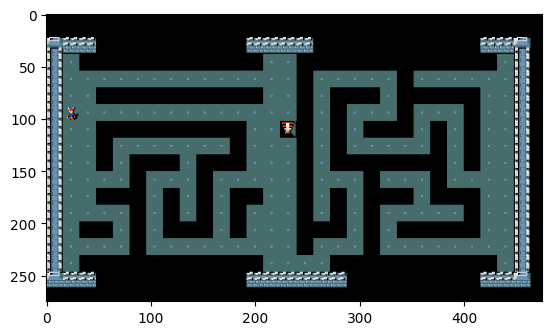

In [70]:
env = gym.make("MiniHack-ExploreMaze-Hard-Mapped-v0", observation_keys=("chars", "pixel"))
state = env.reset()

plt.imshow(state['pixel'][25:300, :475])

game_map = state['chars']
game = state['pixel']

start = get_player_location(game_map)
target = get_target_location(game_map)
print("Agent position:", start)
print("Target position:", target)

CPU times: user 653 ms, sys: 37.1 ms, total: 690 ms
Wall time: 290 ms


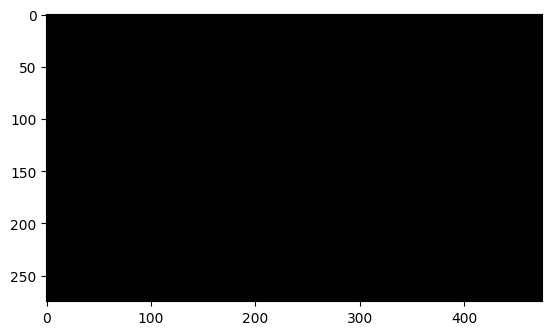

In [28]:
%%time
path = bfs(game_map, start, target)

actions = actions_from_path(start, path[1:])

image = plt.imshow(game[25:300, :475])
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][25:300, :475])

CPU times: user 1.64 s, sys: 60.9 ms, total: 1.7 s
Wall time: 1.17 s


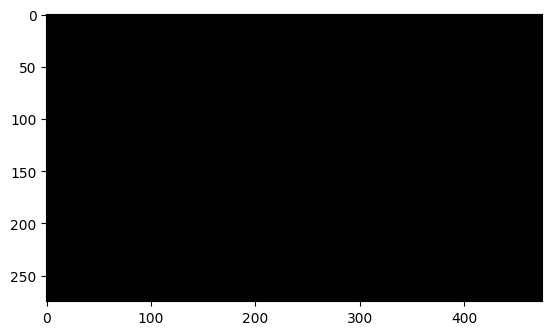

In [13]:
%%time
path = a_star(game_map, start, target, manhattan_distance)

actions = actions_from_path(start, path[1:])

image = plt.imshow(game[25:300, :475])
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][25:300, :475])

RuntimeError: Called step on finished NetHack

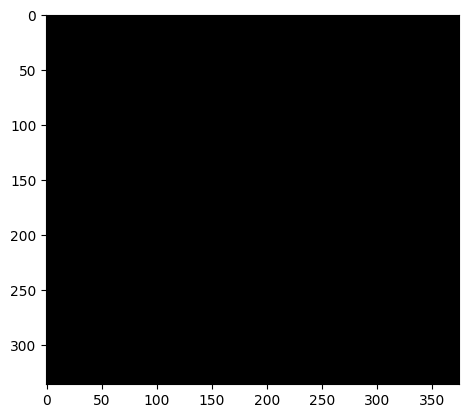

In [36]:
%%time
path = a_star(game_map, start, target, manhattan_distance)

actions = actions_from_path(start, path[1:])

image = plt.imshow(game[0:500, 400:775])
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][0:500, 400:775])

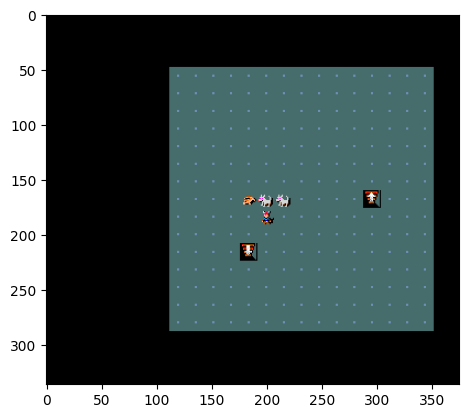

In [120]:
env = gym.make("MiniHack-Room-Monster-15x15-v0", observation_keys=("chars", "pixel", "blstats", "message"))
state = env.reset()

plt.imshow(state['pixel'][0:500, 400:775])

game_map = state['chars']
game = state['pixel']
game_stats = state['blstats']
game_mex = state['message']

start = get_player_location(game_map)
target = get_target_location(game_map)
hp = game_stats[6]
print("Agent position:", start)
print("Target position:", target)


# Aggiungi la funzione per visualizzare il messaggio di Game Over
def display_game_over():
    plt.text(0.5, 0.5, "Game Over: You were killed by monsters!", 
             fontsize=20, ha='center', va='center', color='red', transform=plt.gca().transAxes)

# Aggiungi la funzione per visualizzare il messaggio di Victory
def display_victory():
    plt.text(0.5, 0.5, "Victory: You reached the target!", 
             fontsize=20, ha='center', va='center', color='green', transform=plt.gca().transAxes)

# Avvio della simulazione
path = a_star(game_map, start, target, manhattan_distance)

actions = actions_from_path(start, path[1:])

print(game_mex)

image = plt.imshow(game[0:500, 400:775])
for action in actions:
    s, _, done, _ = env.step(action)  # `done` ti dice se la simulazione è finita
    image.set_data(s['pixel'][0:500, 400:775])

    print(hp)
    
    
    # Se la simulazione è finita per morte, mostra il messaggio di Game Over
    if done:
        # Se il personaggio ha raggiunto il target, mostra il messaggio di Victory
        if hp == 0:  # Assicurati che questa condizione sia corretta per il tuo ambiente di gioco
            display_game_over()  # Mostra il messaggio di Game Over
            #display.display(plt.gcf())  # Mostra il grafico con il messaggio
            break  # Interrompi la simulazione
            
        display_victory()  # Mostra il messaggio di Victory
        #display.display(plt.gcf())  # Mostra il grafico con il messaggio
        break  # Interrompi la simulazione

    # Aggiorna la visualizzazione normale del gioco
    display.display(plt.gcf())
    display.clear_output(wait=True)
